In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [7]:
#initialization
n = 16
y_n = 1
y_0 = 0
dt = .001
dx = 1/n
x = np.linspace(0,1,n+1)
D = 1
print(dt*D/(dx**2))

0.256


In [8]:
def next_step_1(matrix, dt=dt, dx=dx, D=D):
    cons = dt*D/(dx**2)
    n = len(matrix)
    next_matrix = np.copy(matrix)
    
    for j in range (1, n-1):
        
        # west boundary case where x = 0:
        next_matrix[j,0] = matrix[j,0] + cons * (matrix[j,1] + \
        matrix[j,-1] + matrix[j+1,0] + matrix[j-1,0] - 4 * matrix[j,0])

        # non-boundary case 
        for i in range (1, n-1):
            next_matrix[j,i] = matrix[j,i] + cons * (matrix[j,i+1] + \
            matrix[j,i-1] + matrix[j+1,i] + matrix[j-1,i] - 4 * matrix[j,i])

        # east boundary case where x = n:
        next_matrix[j,-1] = matrix[j,-1] + cons * (matrix[j,0] + \
        matrix[j,-2] + matrix[j+1,-1] + matrix[j-1,-1] - 4 * matrix[j,-1])
        
    return next_matrix

In [10]:
domain = np.zeros((n ,n))
domain[0, :] = 1

for _ in range(4):
    print(domain)
    domain = next_step_1(domain)



[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.   ]
 [0.256 0.256 0.256 0.256 0.256 0.256 0.256 0.256 0.256 0.256 0.256 0.256
  0.256 0.2

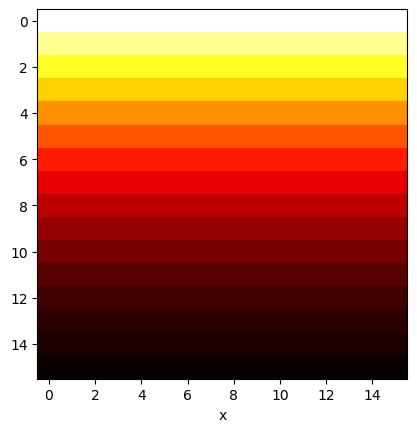

In [12]:
domain = np.zeros((n ,n))
domain[0, :] = 1

fig, ax = plt.subplots()
im = ax.imshow(domain, cmap='hot', animated=True)

ax.set_xlabel("x")
ax.set_ylabel("")

def next_step_1(matrix, dt=dt, dx=dx, D=D):
    cons = dt*D/(dx**2)
    n = len(matrix)
    next_matrix = np.zeros(matrix.shape)
    next_matrix[0] = 1
    for j in range (1, n-1):
        next_matrix[j,0] = matrix[j,0] + cons * (matrix[j,1] + \
        matrix[j,n-1] + matrix[j+1,0] + matrix[j-1,0] - 4 * matrix[j,0])
        for i in range (1, n-1):
            next_matrix[j,i] = matrix[j,i] + cons * (matrix[j,i+1] + \
            matrix[j,i-1] + matrix[j+1,i] + matrix[j-1,i] - 4 * matrix[j,i])
        next_matrix[j,n-1] = matrix[j,n-1] + cons * (matrix[j,0] + \
        matrix[j,n-2] + matrix[j+1,n-1] + matrix[j-1,n-1] - 4 * matrix[j,n-1])
    return next_matrix

def update(frame):
    global domain
    domain = next_step_1(domain)
    im.set_array(domain)
    return [im]


ani = animation.FuncAnimation(fig, update, frames=100, interval=100, blit=False)

HTML(ani.to_jshtml())